In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = r"C:\Users\ADMIN\OneDrive\Desktop\New folder\Pandas\mlproject\spam (1).csv"
file_path = r"C:\Users\ADMIN\OneDrive\Desktop\New folder\Pandas\mlproject\spam (2).csv"


df = pd.read_csv(file_path, encoding="ISO-8859-1")  
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
147,ham,Ummma.will call after check in.our life will b...,NaN,NaN,NaN
2476,ham,i dnt wnt to tlk wid u,NaN,NaN,NaN
578,spam,"our mobile number has won å£5000, to claim cal...",NaN,NaN,NaN
5195,ham,Darren was saying dat if u meeting da ge den w...,NaN,NaN,NaN
2025,ham,"Yes obviously, but you are the eggs-pert and t...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

#1.Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:

#drop.last 3 coloms
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4725,ham,Jason says it's cool if we pick some up from h...
3522,ham,Try neva mate!!
757,ham,"Faith makes things possible,Hope makes things ..."
2164,ham,"Nothing really, just making sure everybody's u..."
3496,ham,"Oh, the grand is having a bit of a party but i..."


In [8]:
# renaming the cols

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4615,ham,ÌÏ called dad oredi...
5424,ham,U horrible gal... U knew dat i was going out w...
1641,ham,"Hi , where are you? We're at and they're not ..."
31,ham,Yeah he got in at 2 and was v apologetic. n ha...
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate values

df.duplicated().sum()

np.int64(403)

In [14]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

2.EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

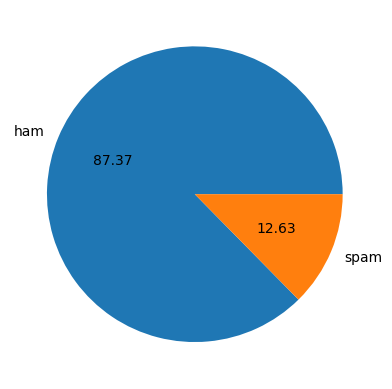

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:


# num of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [25]:

#extra part of num_words
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['text'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))



In [26]:

#extra part of num_words
print('num_characters' in df.columns)  # Should print True if it exists
print('num_words' in df.columns)
print('num_sentences' in df.columns)



True
True
True


In [27]:
#extra part

df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.461018
std,58.236293,11.068488,2.686481
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,42.000000


In [29]:
#ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.384190
std,56.358207,11.116240,2.773408
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,42.000000


In [30]:
#Spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.992343
std,30.137753,5.967672,1.902114
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,13.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

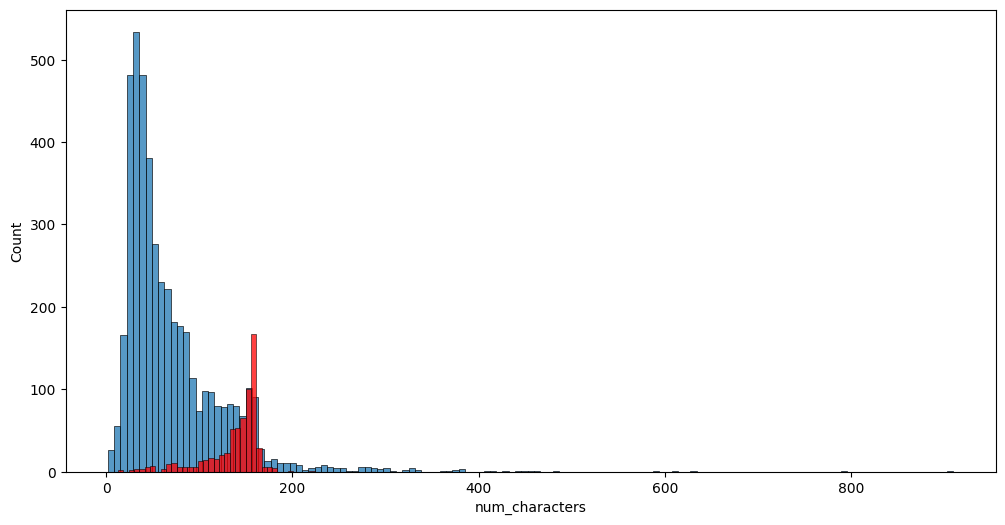

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

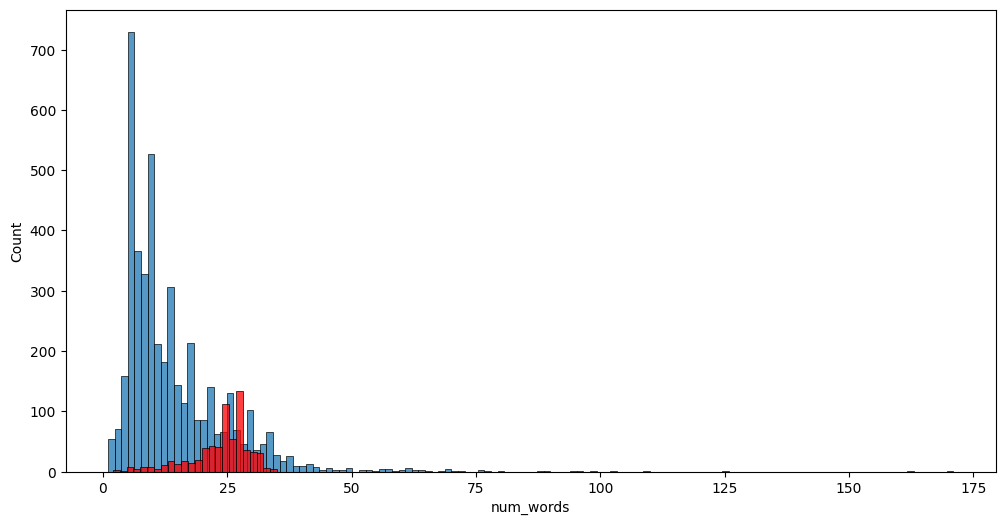

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


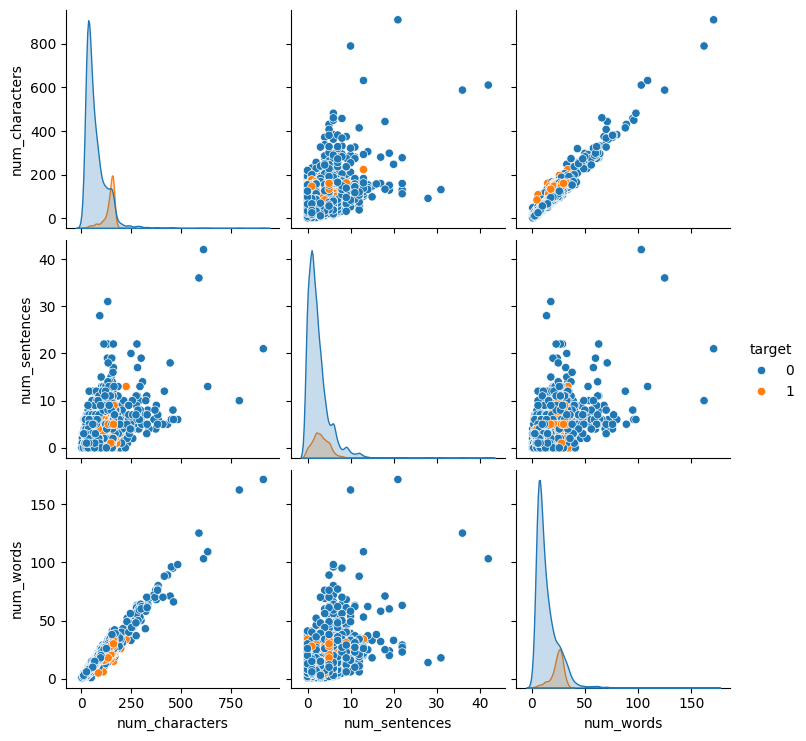

In [34]:
sns.pairplot(df,hue='target')

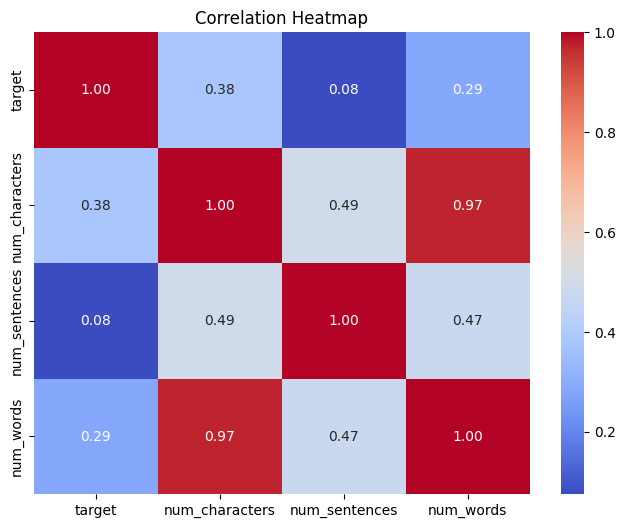

In [35]:


import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Draw Correlation Heatmap Plot 
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [36]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


nltk.download('stopwords')
nltk.download('punkt')


ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize the text

    y = []
    for i in text:
        if i.isalnum():  # Remove non-alphanumeric characters
            y.append(i)
    
    text = y[:]  # Copy cleaned words
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  # Remove stopwords & punctuation
            y.append(i)

    text = y[:]  # Copy filtered words
    y.clear()

    for i in text:
        y.append(ps.stem(i))  # Apply stemming

    return " ".join(y)

# Example usage:
sample_text = "This is an example! It's a spam message."
print(transform_text(sample_text))


exampl spam messag


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
transform_text('Hi how Are you Aarzoo?')


'hi aarzoo'

In [39]:

df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
from nltk.stem import PorterStemmer  

ps = PorterStemmer()
print(ps.stem('loving')) 

love


In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,8,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,6,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,13,nah think goe usf live around though


In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

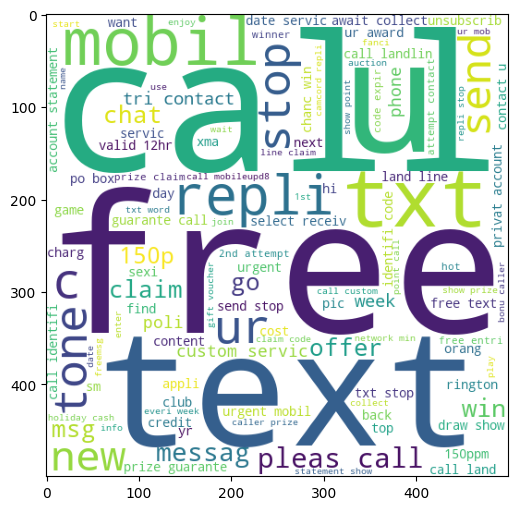

In [58]:
plt.figure(figsize=(11,6))
plt.imshow(spam_wc)

In [59]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

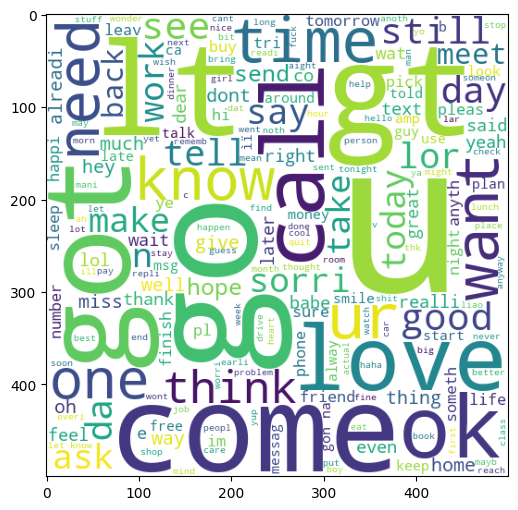

In [60]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,8,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,6,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,0,13,nah think goe usf live around though


In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

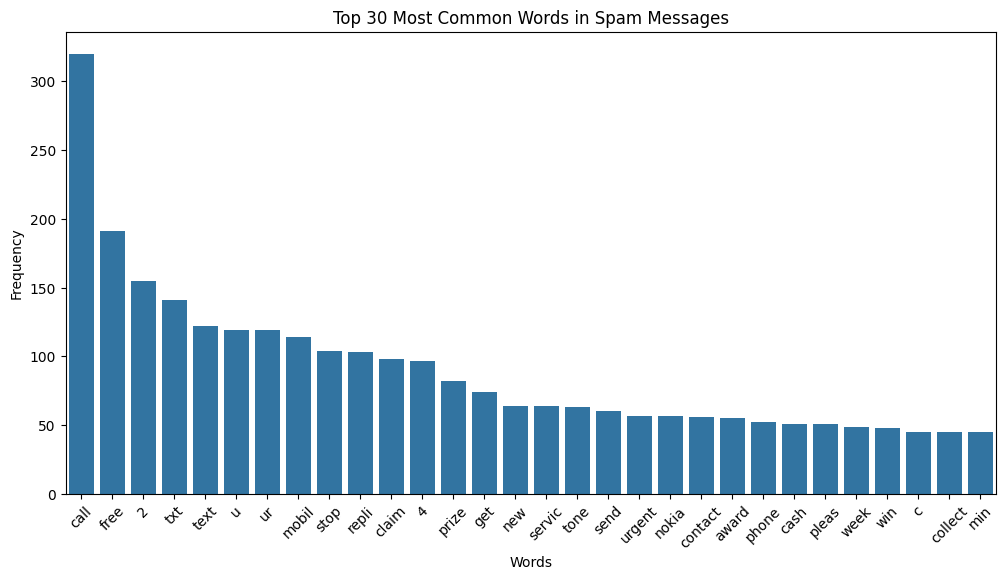

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

spam_corpus = " ".join(df[df['target'] == 1]['transformed_text']).split()
spam_counter = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counter, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=spam_df)

plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist(): 
    for word in msg.split():
        ham_corpus.append(word)


In [53]:
len(ham_corpus)

35404

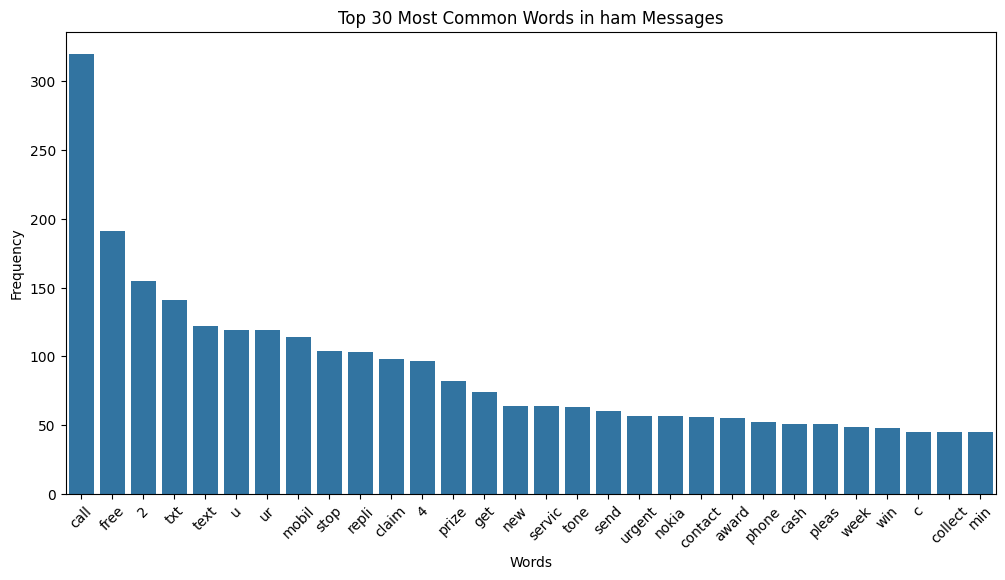

In [55]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


ham_corpus = " ".join(df[df['target'] == 0]['transformed_text']).split()
ham_counter = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_counter, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=spam_df)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in ham Messages")
plt.show()


In [55]:


print(df.head())

   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_sentences  num_words                                   transformed_text  
0              8         20  go jurong point crazi avail bugi n great world...  
1              6          6                              ok lar joke wif u oni  
2              1         28  free entri 2 wkli comp win fa cup final tkt 21...  
3              6         11                u dun say earli hor u c alreadi say  
4              0         13               nah think goe usf live around though  


4.Model Building


In [56]:
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_sentences', 'num_words',
       'transformed_text'],
      dtype='object')


In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [58]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [60]:
y = df['target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [64]:
#df.fillna("", inplace=True)


In [65]:
#pip install nltk


In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[784 112]
 [ 16 122]]
0.5213675213675214


In [69]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [70]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [71]:
!pip install --upgrade pip
!pip install xgboost


In [72]:
# tfidf --> MNB

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier  


In [87]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators= 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)  


In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}    

In [89]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
   clf.fit(x_train, y_train)
   y_pred = clf.predict(x_test)
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)

   return accuracy, precision

In [90]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9700193423597679, 0.9421487603305785)

In [91]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) 



For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [92]:
performance_df = pd.DataFrame({'Algorithms': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy', ascending=False)

In [93]:
performance_df

,Algorithms,Accuracy,Precision
2,NB,0.978723,0.946154
8,ETC,0.974855,0.974576
5,RF,0.973888,0.982609
0,SVC,0.970019,0.942149
4,LR,0.967118,0.964286
10,xgb,0.965184,0.939655
7,BgC,0.958414,0.868217
9,GBDT,0.950677,0.930693
3,DT,0.930368,0.830000
6,AdaBoost,0.921663,0.820225


In [94]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithms") 


In [95]:
performance_df1

,Algorithms,variable,value
0,NB,Accuracy,0.978723
1,ETC,Accuracy,0.974855
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.970019
4,LR,Accuracy,0.967118
5,xgb,Accuracy,0.965184
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.950677
8,DT,Accuracy,0.930368
9,AdaBoost,Accuracy,0.921663


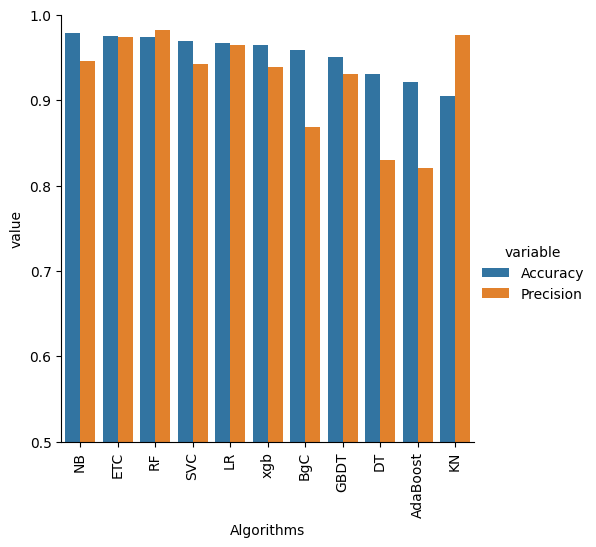

In [96]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Algorithms', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [97]:
# model improve
# 1. change the max_feature parameter of Tfidf

In [98]:
temp_df = pd.DataFrame({'Algorithms': list(clfs.keys()), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Accuracy_max_ft_3000', ascending=False)

In [99]:
temp_df = pd.DataFrame({'Algorithms': list(clfs.keys()), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values('Accuracy_scaling', ascending=False)

In [100]:
new_df = performance_df.merge(temp_df,on='Algorithms')

In [101]:
new_df_scaled = new_df.merge(temp_df,on='Algorithms')

In [103]:
#voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [102]:
new_df_scaled

,Algorithms,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
1,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
4,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
5,xgb,0.965184,0.939655,0.965184,0.939655,0.965184,0.939655
6,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,DT,0.930368,0.830000,0.930368,0.830000,0.930368,0.830000
9,AdaBoost,0.921663,0.820225,0.921663,0.820225,0.921663,0.820225


In [104]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [105]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [106]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [107]:
y_pred = voting.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [108]:
#Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [109]:
from sklearn.ensemble import StackingClassifier

In [110]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [111]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [112]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))